In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("placement(1).csv")

In [ ]:
df.shape

(1000, 3)

In [ ]:
df.sample(5)

cgpa  placement_exam_marks  placed
332  7.03                  39.0       0
706  7.11                  13.0       1
396  7.28                  10.0       1
412  6.50                  45.0       1
872  6.95                  54.0       0

/tmp/ipython-input-40043834.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'])
/tmp/ipython-input-40043834.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])


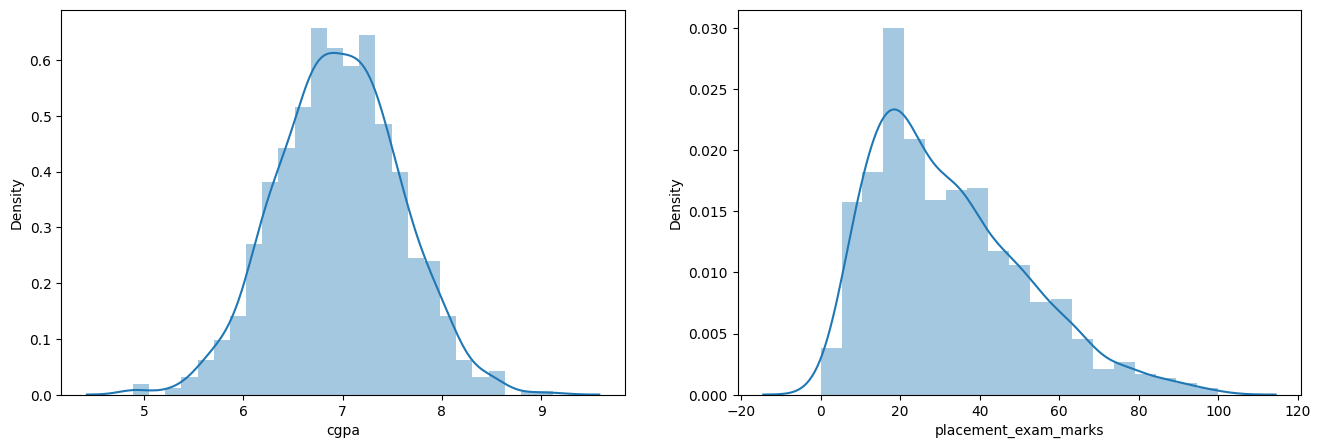

In [ ]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])

plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])

plt.show()



In [ ]:
df["placement_exam_marks"].skew()

np.float64(0.8356419499466834)

In [ ]:


print("Mean value of cgpa",df['cgpa'].mean())
print("Std value of cgpa",df['cgpa'].std())
print("Min value of cgpa",df['cgpa'].min())
print("Max value of cgpa",df['cgpa'].max())



Mean value of cgpa 6.96124
Std value of cgpa 0.6158978751323894
Min value of cgpa 4.89
Max value of cgpa 9.12


In [ ]:

# Finding the boundary values
print("Highest allowed", df["cgpa"].mean() + 3*df["cgpa"].std())
print("Lowest allowed", df["cgpa"].mean() -3*df["cgpa"].std())

print()

Highest allowed 8.808933625397168
Lowest allowed 5.113546374602832



In [ ]:
df[(df['cgpa'] > 8.80) | (df['cgpa'] < 5.11)]

cgpa  placement_exam_marks  placed
485  4.92                  44.0       1
995  8.87                  44.0       1
996  9.12                  65.0       1
997  4.89                  34.0       0
999  4.90                  10.0       1

In [ ]:
new_df = df[(df['cgpa'] < 8.80) & (df['cgpa'] > 5.11)]
new_df

cgpa  placement_exam_marks  placed
0    7.19                  26.0       1
1    7.46                  38.0       1
2    7.54                  40.0       1
3    6.42                   8.0       1
4    7.23                  17.0       0
..    ...                   ...     ...
991  7.04                  57.0       0
992  6.26                  12.0       0
993  6.73                  21.0       1
994  6.48                  63.0       0
998  8.62                  46.0       1

[995 rows x 3 columns]

### Z Score Method 2 Use

In [ ]:
df['zscore'] = (df["cgpa"] - df["cgpa"].mean())/df["cgpa"].std()

In [ ]:
df.head()

cgpa  placement_exam_marks  placed    zscore
0  7.19                  26.0       1  0.371425
1  7.46                  38.0       1  0.809810
2  7.54                  40.0       1  0.939701
3  6.42                   8.0       1 -0.878782
4  7.23                  17.0       0  0.436371

In [ ]:
df[df['zscore'] > 3]



cgpa  placement_exam_marks  placed    zscore
995  8.87                  44.0       1  3.099150
996  9.12                  65.0       1  3.505062

In [ ]:
df[df['zscore'] < 3]

cgpa  placement_exam_marks  placed    zscore
0    7.19                  26.0       1  0.371425
1    7.46                  38.0       1  0.809810
2    7.54                  40.0       1  0.939701
3    6.42                   8.0       1 -0.878782
4    7.23                  17.0       0  0.436371
..    ...                   ...     ...       ...
993  6.73                  21.0       1 -0.375452
994  6.48                  63.0       0 -0.781363
997  4.89                  34.0       0 -3.362960
998  8.62                  46.0       1  2.693239
999  4.90                  10.0       1 -3.346724

[998 rows x 4 columns]

In [ ]:
#trimming
new_df = df[(df['zscore'] < 3) & (df['zscore']> -3)]
new_df.head()

cgpa  placement_exam_marks  placed    zscore
0  7.19                  26.0       1  0.371425
1  7.46                  38.0       1  0.809810
2  7.54                  40.0       1  0.939701
3  6.42                   8.0       1 -0.878782
4  7.23                  17.0       0  0.436371

### capping

In [ ]:
upper_limit = df['cgpa'].mean() + 3 *df['cgpa'].std()
lower_limit = df['cgpa'].mean() - 3*df['cgpa'].std()

In [ ]:
lower_limit

np.float64(5.113546374602832)

In [ ]:
df['cgpa'] = np.where(
    df['cgpa'] > upper_limit,
    upper_limit,
    np.where(
        df['cgpa'] < lower_limit,
        lower_limit,
        df['cgpa']
    )
)

In [ ]:
df

cgpa  placement_exam_marks  placed    zscore
0    7.190000                  26.0       1  0.371425
1    7.460000                  38.0       1  0.809810
2    7.540000                  40.0       1  0.939701
3    6.420000                   8.0       1 -0.878782
4    7.230000                  17.0       0  0.436371
..        ...                   ...     ...       ...
995  8.808934                  44.0       1  3.099150
996  8.808934                  65.0       1  3.505062
997  5.113546                  34.0       0 -3.362960
998  8.620000                  46.0       1  2.693239
999  5.113546                  10.0       1 -3.346724

[1000 rows x 4 columns]